In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as plticker

In [9]:
gt = pd.read_csv('../data/ebola_drc_updates/Ebola_Updated_Aug2.csv', delimiter=',')
gt['Date'] = gt.date.apply(lambda x: datetime.strptime(str(x),'%Y%m%d'))
gt['Ob_Day'] = gt.Date.apply(lambda x : (x - datetime.strptime('20180805','%Y%m%d')).days)
gt = gt[(gt.Date>=datetime.strptime('20180805','%Y%m%d'))&(gt.Date<=datetime.strptime('20190721','%Y%m%d'))] 
## Starting on August 5th, the first non-NaN value
## Ending on July 21st, the end of daily updates

### Evaluating Dec 21st forecasts

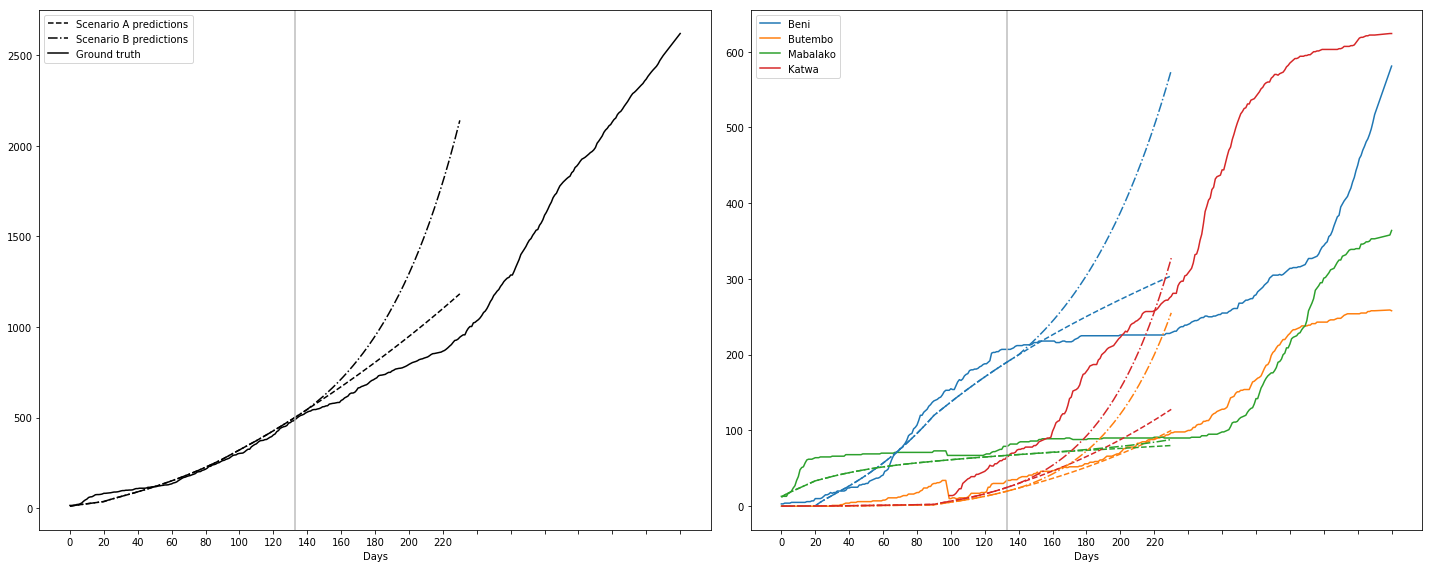

In [4]:
f,axarr = plt.subplots(1,2,figsize=(20,8))
forecasta = pd.read_csv('../outputs/2018dec21/forecast_2018dec21_sca.csv',index_col=0)
forecasta.sum().cumsum().plot(ax=axarr[0], ls = '--',  label='Scenario A predictions',color='k')

forecastb = pd.read_csv('../outputs/2018dec21/forecast_2018dec21_scb.csv',index_col=0)
forecastb.sum().cumsum().plot(ax=axarr[0], ls = '-.', label='Scenario B predictions',color='k')
axarr[0].legend(fontsize=12)

gt[gt.health_zone=='all'].plot(x='Ob_Day',y='total_c', label='Ground truth',color='k', ax=axarr[0])
last_obday = gt[gt.date==20181216]['Ob_Day'].values[0]
axarr[0].axvline(last_obday,color='#bdbdbd')

key_hzs = ['BENI','BUTEMBO','MABALAKO','KATWA']
gt[gt.health_zone.isin([k.title() for k in key_hzs])].pivot(index='health_zone',columns='Ob_Day',values='total_c').loc[[k.title() for k in key_hzs]].T.plot(ax=axarr[1])

axarr[1].legend(title='')
axarr[1].legend(fontsize=12)

axarr[1].axvline(last_obday,color='#bdbdbd')
axarr[1].set_prop_cycle(None)
forecasta.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='--', legend=False)

axarr[1].set_prop_cycle(None)
forecastb.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='-.', legend=False)

loc = plticker.MultipleLocator(base=20) 
axarr[0].xaxis.set_major_locator(loc)
axarr[1].xaxis.set_major_locator(loc)
axarr[0].set_xticklabels(np.arange(-20,len(forecasta.columns),20))
axarr[1].set_xticklabels(np.arange(-20,len(forecasta.columns),20))

axarr[0].set_xlabel('Days')
axarr[1].set_xlabel('Days')

plt.tight_layout()
plt.savefig('../plots/compare_2018dec21.png',dpi=100)

### Evaluating Jan 23rd forecasts (based on data till Jan 18th)

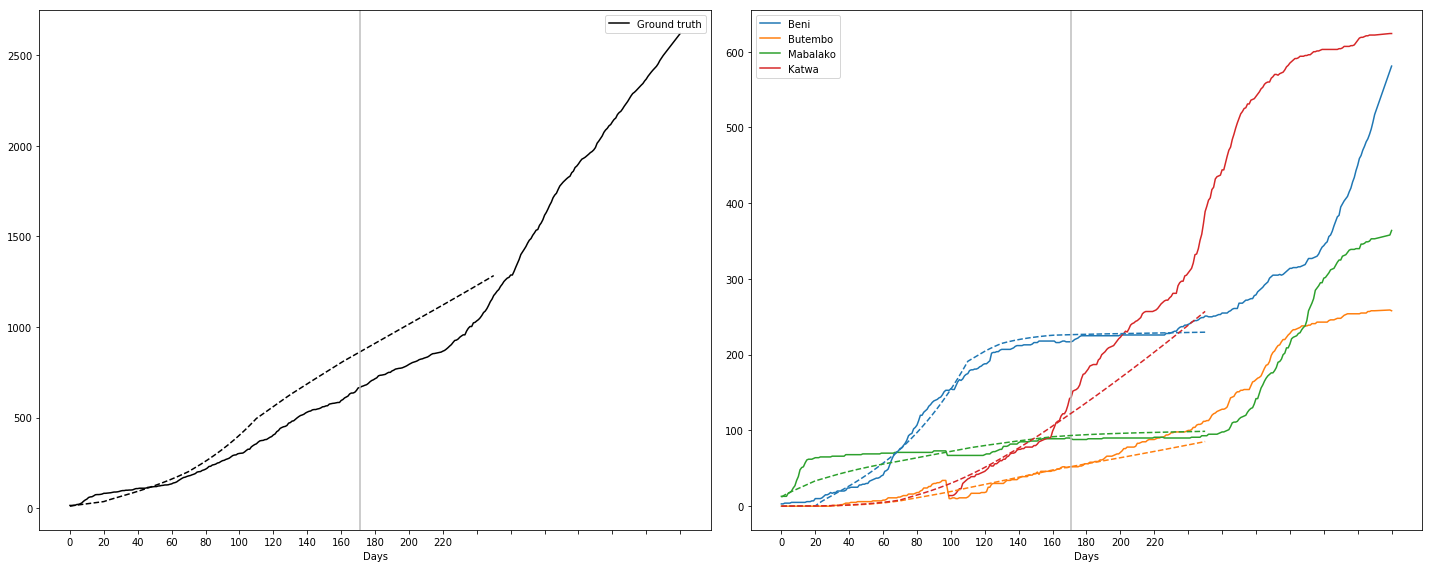

In [5]:
f,axarr = plt.subplots(1,2,figsize=(20,8))
forecast = pd.read_csv('../outputs/2019feb07/forecast_2019jan23.csv',index_col=0)
forecast.sum().cumsum().plot(ax=axarr[0], ls = '--',  label='Predictions',color='k')

gt[gt.health_zone=='all'].plot(x='Ob_Day',y='total_c', label='Ground truth',color='k', ax=axarr[0])
last_obday = gt[gt.date==20190123]['Ob_Day'].values[0]
axarr[0].axvline(last_obday,color='#bdbdbd')

key_hzs = ['BENI','BUTEMBO','MABALAKO','KATWA']
gt[gt.health_zone.isin([k.title() for k in key_hzs])].pivot(index='health_zone',columns='Ob_Day',values='total_c').loc[[k.title() for k in key_hzs]].T.plot(ax=axarr[1])

axarr[1].legend(title='')
axarr[1].legend(fontsize=12)

axarr[1].axvline(last_obday,color='#bdbdbd')
axarr[1].set_prop_cycle(None)
forecast.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='--', legend=False)

loc = plticker.MultipleLocator(base=20) 
axarr[0].xaxis.set_major_locator(loc)
axarr[1].xaxis.set_major_locator(loc)
axarr[0].set_xticklabels(np.arange(-20,len(forecasta.columns),20))
axarr[1].set_xticklabels(np.arange(-20,len(forecasta.columns),20))

axarr[0].set_xlabel('Days')
axarr[1].set_xlabel('Days')

plt.tight_layout()
plt.savefig('../plots/compare_2019jan23.png',dpi=100)

### Evaluating Feb 28th forecasts 

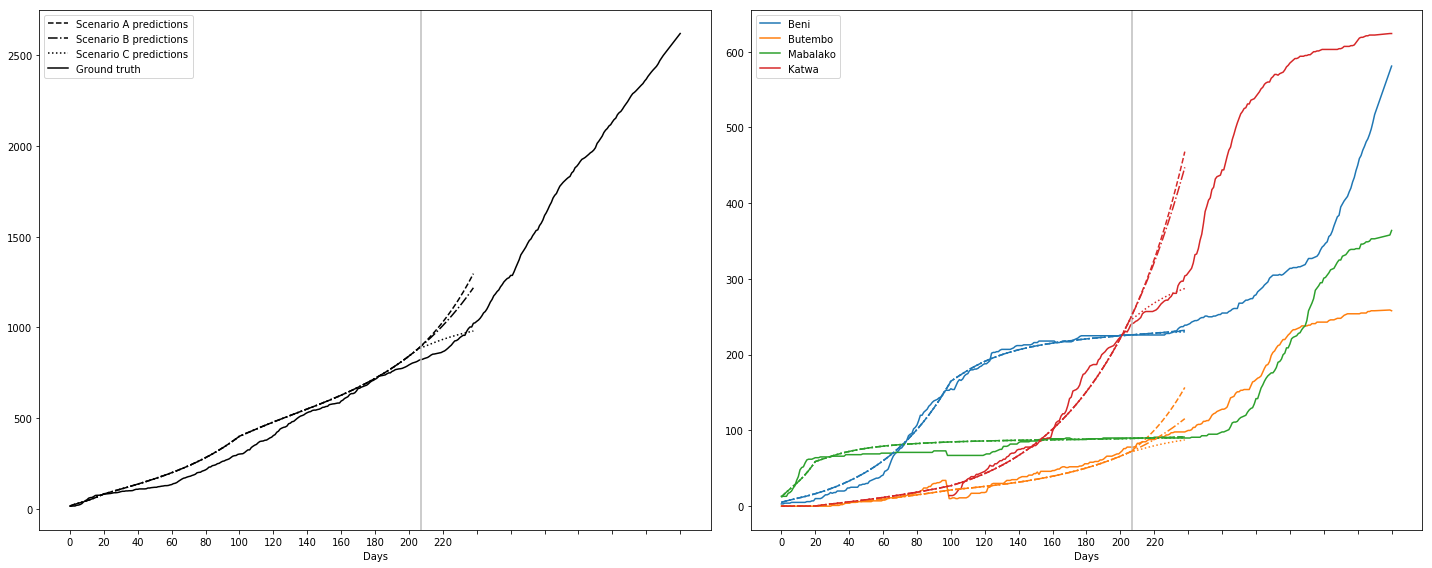

In [6]:
f,axarr = plt.subplots(1,2,figsize=(20,8))
forecasta = pd.read_csv('../outputs/2019feb28/forecast_2019feb28_scA.csv',index_col=0)
forecasta.sum().cumsum().plot(ax=axarr[0], ls = '--',  label='Scenario A predictions',color='k')

forecastb = pd.read_csv('../outputs/2019feb28/forecast_2019feb28_scB.csv',index_col=0)
forecastb.sum().cumsum().plot(ax=axarr[0], ls = '-.', label='Scenario B predictions',color='k')
axarr[0].legend(fontsize=12)

forecastc = pd.read_csv('../outputs/2019feb28/forecast_2019feb28_scC.csv',index_col=0)
forecastc.sum().cumsum().plot(ax=axarr[0], ls = ':', label='Scenario C predictions',color='k')
axarr[0].legend(fontsize=12)

gt[gt.health_zone=='all'].plot(x='Ob_Day',y='total_c', label='Ground truth',color='k', ax=axarr[0])
last_obday = gt[gt.date==20190228]['Ob_Day'].values[0]
axarr[0].axvline(last_obday,color='#bdbdbd')

key_hzs = ['BENI','BUTEMBO','MABALAKO','KATWA']
gt[gt.health_zone.isin([k.title() for k in key_hzs])].pivot(index='health_zone',columns='Ob_Day',values='total_c').loc[[k.title() for k in key_hzs]].T.plot(ax=axarr[1])

axarr[1].legend(title='')
axarr[1].legend(fontsize=12)

axarr[1].axvline(last_obday,color='#bdbdbd')
axarr[1].set_prop_cycle(None)
forecasta.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='--', legend=False)

axarr[1].set_prop_cycle(None)
forecastb.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='-.',legend=False)

axarr[1].set_prop_cycle(None)
forecastc.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls=':',legend=False)


loc = plticker.MultipleLocator(base=20) 
axarr[0].xaxis.set_major_locator(loc)
axarr[1].xaxis.set_major_locator(loc)
axarr[0].set_xticklabels(np.arange(-20,len(forecasta.columns),20))
axarr[1].set_xticklabels(np.arange(-20,len(forecasta.columns),20))

axarr[0].set_xlabel('Days')
axarr[1].set_xlabel('Days')

plt.tight_layout()
plt.savefig('../plots/compare_2019feb28.png',dpi=100)

### Evaluating Apr 25th forecasts 

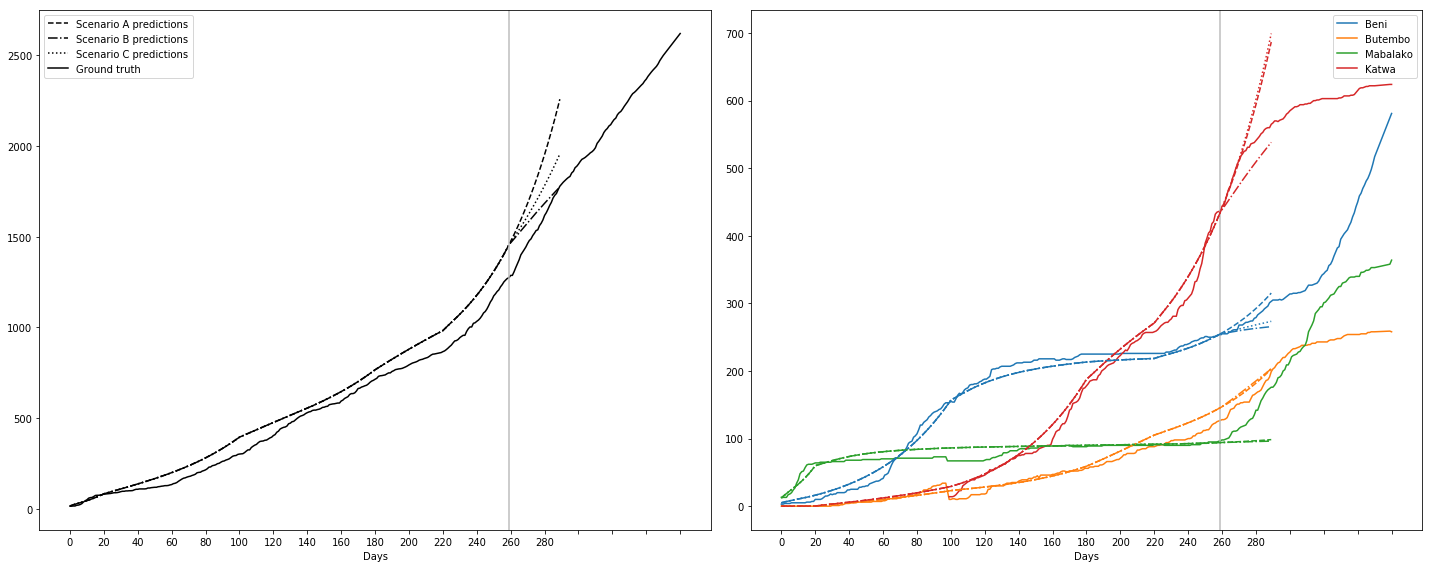

In [7]:
f,axarr = plt.subplots(1,2,figsize=(20,8))
forecasta = pd.read_csv('../outputs/2019apr25/forecast_2019apr25_scA.csv',index_col=0)
forecasta.sum().cumsum().plot(ax=axarr[0], ls = '--',  label='Scenario A predictions',color='k')

forecastb = pd.read_csv('../outputs/2019apr25/forecast_2019apr25_scB.csv',index_col=0)
forecastb.sum().cumsum().plot(ax=axarr[0], ls = '-.', label='Scenario B predictions',color='k')
axarr[0].legend(fontsize=12)

forecastc = pd.read_csv('../outputs/2019apr25/forecast_2019apr25_scC.csv',index_col=0)
forecastc.sum().cumsum().plot(ax=axarr[0], ls = ':', label='Scenario C predictions',color='k')
axarr[0].legend(fontsize=12)

gt[gt.health_zone=='all'].plot(x='Ob_Day',y='total_c', label='Ground truth',color='k', ax=axarr[0])
last_obday = gt[gt.date==20190421]['Ob_Day'].values[0]
axarr[0].axvline(last_obday,color='#bdbdbd')

key_hzs = ['BENI','BUTEMBO','MABALAKO','KATWA']
gt[gt.health_zone.isin([k.title() for k in key_hzs])].pivot(index='health_zone',columns='Ob_Day',values='total_c').loc[[k.title() for k in key_hzs]].T.plot(ax=axarr[1])

axarr[1].legend(title='')
axarr[1].legend(fontsize=12)

axarr[1].axvline(last_obday,color='#bdbdbd')
axarr[1].set_prop_cycle(None)
forecasta.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='--', legend=False)

axarr[1].set_prop_cycle(None)
forecastb.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='-.',legend=False)

axarr[1].set_prop_cycle(None)
forecastc.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls=':',legend=False)


loc = plticker.MultipleLocator(base=20) 
axarr[0].xaxis.set_major_locator(loc)
axarr[1].xaxis.set_major_locator(loc)
axarr[0].set_xticklabels(np.arange(-20,len(forecasta.columns),20))
axarr[1].set_xticklabels(np.arange(-20,len(forecasta.columns),20))

axarr[0].set_xlabel('Days')
axarr[1].set_xlabel('Days')

plt.tight_layout()
plt.savefig('../plots/compare_2019apr25.png',dpi=100)

### Evaluating May 15th forecasts 

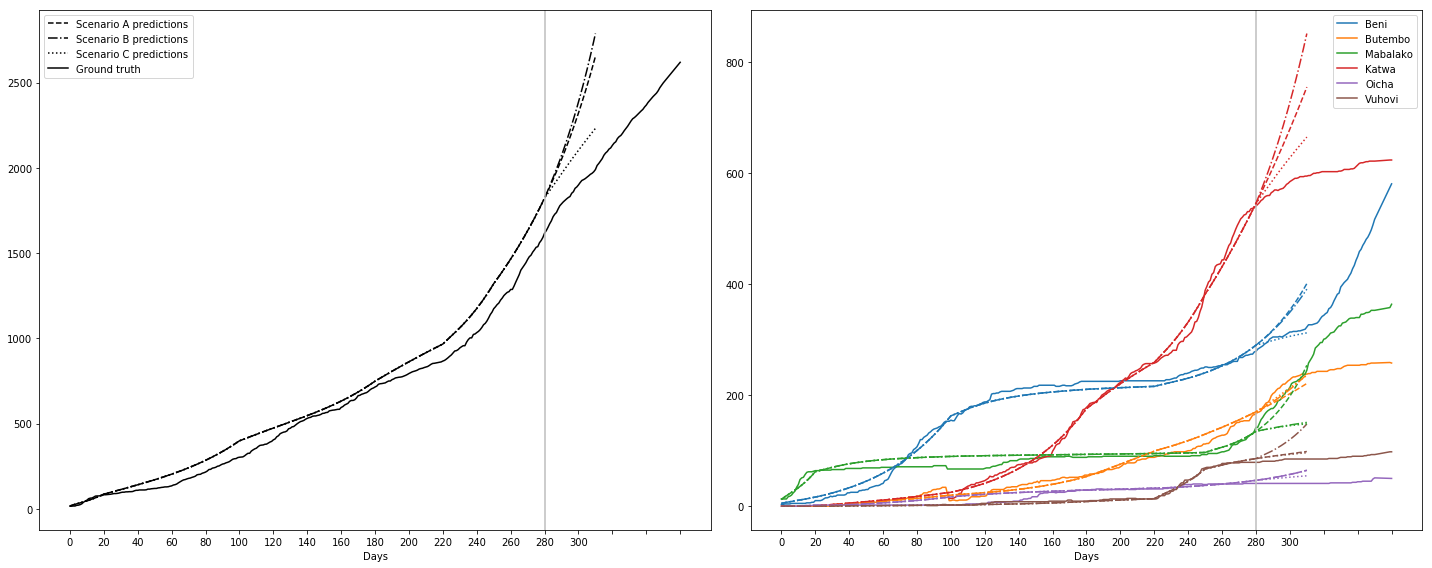

In [9]:
f,axarr = plt.subplots(1,2,figsize=(20,8))
forecasta = pd.read_csv('../outputs/2019may15/forecast_2019may15_scA.csv',index_col=0)
forecasta.sum().cumsum().plot(ax=axarr[0], ls = '--',  label='Scenario A predictions',color='k')

forecastb = pd.read_csv('../outputs/2019may15/forecast_2019may15_scB.csv',index_col=0)
forecastb.sum().cumsum().plot(ax=axarr[0], ls = '-.', label='Scenario B predictions',color='k')
axarr[0].legend(fontsize=12)

forecastc = pd.read_csv('../outputs/2019may15/forecast_2019may15_scC.csv',index_col=0)
forecastc.sum().cumsum().plot(ax=axarr[0], ls = ':', label='Scenario C predictions',color='k')
axarr[0].legend(fontsize=12)

gt[gt.health_zone=='all'].plot(x='Ob_Day',y='total_c', label='Ground truth',color='k', ax=axarr[0])
last_obday = gt[gt.date==20190512]['Ob_Day'].values[0]
axarr[0].axvline(last_obday,color='#bdbdbd')

key_hzs = ['BENI','BUTEMBO','MABALAKO','KATWA', 'OICHA', 'VUHOVI']
gt[gt.health_zone.isin([k.title() for k in key_hzs])].pivot(index='health_zone',columns='Ob_Day',values='total_c').loc[[k.title() for k in key_hzs]].T.plot(ax=axarr[1])

axarr[1].legend(title='')
axarr[1].legend(fontsize=12)

axarr[1].axvline(last_obday,color='#bdbdbd')
axarr[1].set_prop_cycle(None)
forecasta.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='--', legend=False)

axarr[1].set_prop_cycle(None)
forecastb.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='-.',legend=False)

axarr[1].set_prop_cycle(None)
forecastc.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls=':',legend=False)


loc = plticker.MultipleLocator(base=20) 
axarr[0].xaxis.set_major_locator(loc)
axarr[1].xaxis.set_major_locator(loc)
axarr[0].set_xticklabels(np.arange(-20,len(forecasta.columns),20))
axarr[1].set_xticklabels(np.arange(-20,len(forecasta.columns),20))

axarr[0].set_xlabel('Days')
axarr[1].set_xlabel('Days')

plt.tight_layout()
plt.savefig('../plots/compare_2019may15.png',dpi=100)

### Evaluating Aug 11th forecasts

No handles with labels found to put in legend.
No handles with labels found to put in legend.


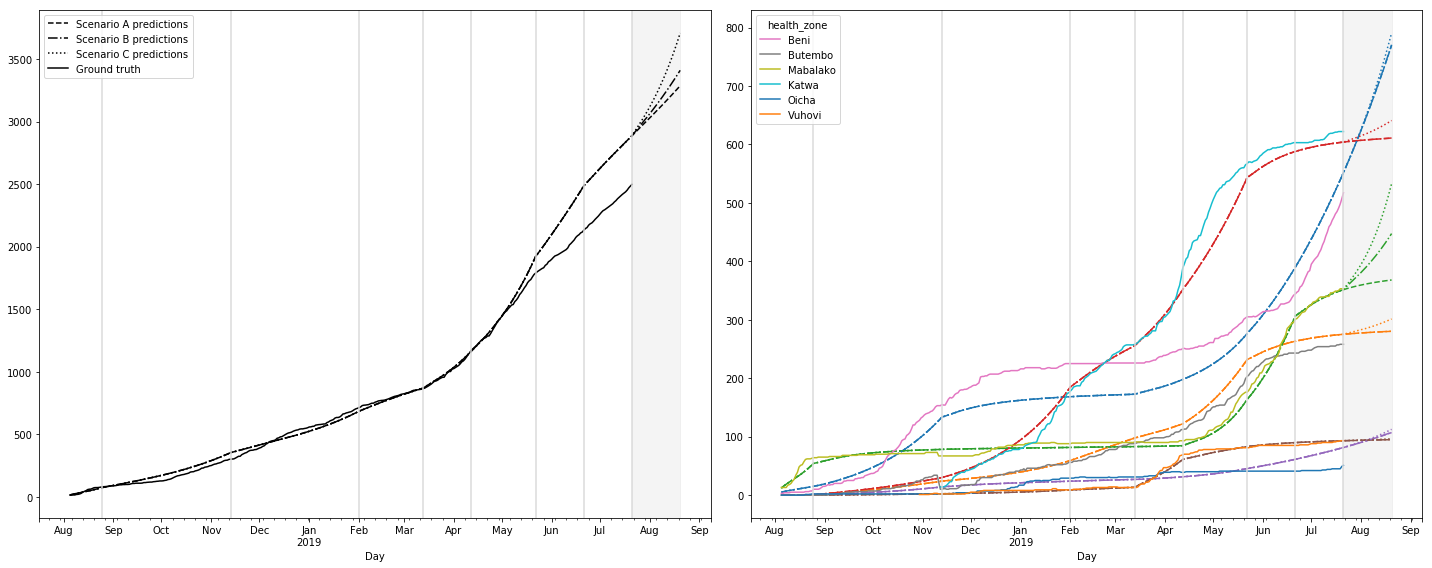

In [34]:
f,axarr = plt.subplots(1,2,figsize=(20,8))
dates = gt[gt.health_zone=='all'].Date.values
horizon=30
dates = np.concatenate([dates, [dates[-1] + np.timedelta64(x+1,'D') for x in range(horizon)]])
    
forecasta = pd.read_csv('../outputs/forecast_2019aug11_scA.csv',index_col=0,names=dates,skiprows=1)
forecasta.sum().cumsum().plot(ax=axarr[0], ls = '--',  label='Scenario A predictions',color='k')

forecastb = pd.read_csv('../outputs/forecast_2019aug11_scB.csv',index_col=0,names=dates,skiprows=1)
forecastb.sum().cumsum().plot(ax=axarr[0], ls = '-.', label='Scenario B predictions',color='k')
axarr[0].legend(fontsize=12)

forecastc = pd.read_csv('../outputs/forecast_2019aug11_scC.csv',index_col=0,names=dates,skiprows=1)
forecastc.sum().cumsum().plot(ax=axarr[0], ls = ':', label='Scenario C predictions',color='k')
axarr[0].legend(fontsize=12)

gt[gt.health_zone=='all'].plot(x='Date',y='total_c', label='Ground truth',color='k', ax=axarr[0])
    
key_hzs = ['BENI','BUTEMBO','MABALAKO','KATWA', 'OICHA', 'VUHOVI']
axarr[1].legend(title='')
axarr[1].legend(fontsize=12)

axarr[1].set_prop_cycle(None)
forecasta.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='--', legend=False)

axarr[1].set_prop_cycle(None)
forecastb.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls='-.',legend=False)

axarr[1].set_prop_cycle(None)
forecastc.loc[key_hzs].cumsum(axis=1).T.plot(ax=axarr[1],ls=':',legend=False)
gt[gt.health_zone.isin([k.title() for k in key_hzs])].pivot(index='health_zone',columns='Date',values='total_c').loc[[k.title() for k in key_hzs]].T.plot(ax=axarr[1])

cp_timings = [20,100,180,220,250,290,320,350]    
cp_dates = gt[gt.Ob_Day.isin(cp_timings)]['Date'].unique()
for t in cp_dates:
    axarr[0].axvline(t,color='#dbdbdb')
    axarr[1].axvline(t,color='#dbdbdb')
    
axarr[0].axvspan(dates[-horizon-1],dates[-1],color='#dbdbdb',alpha=0.3)
axarr[1].axvspan(dates[-horizon-1],dates[-1],color='#dbdbdb',alpha=0.3)

axarr[0].set_xlabel('Day')
axarr[1].set_xlabel('Day')

plt.tight_layout()
plt.savefig('../plots/compare_2019aug11.png',dpi=100)